In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, GridSearchCV, RepeatedStratifiedKFold
from sklearn.metrics import accuracy_score, f1_score, classification_report, roc_curve, auc, roc_auc_score
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay, roc_curve, auc, RocCurveDisplay
from scikitplot.metrics import plot_roc
from sklearn.preprocessing import LabelEncoder
from collections import defaultdict
import copy


# Data Preparation

In [40]:
#importo il train e test encoded (sto importando quelli GIÀ ONE HOT ENCODED)
df_train = pd.read_csv('df_train_mod2.csv')
df_test = pd.read_csv('df_test_mod2.csv')

#Prendo la variabile target, in questo caso emotion:
y_train = df_train['emotion']
y_test = df_test['emotion']

#tolgo emotion visto che l'ho salvata nella y - IMPORTANTE!
df_train.drop(columns=['emotion'],inplace=True)
df_test.drop(columns=['emotion'],inplace=True)

columns_to_scale_train = df_train.iloc[:, :-5]
columns_to_scale_test = df_test.iloc[:, :-5]


# Extract the columns to be kept as they are
columns_to_keep_train = df_train.iloc[:, -5:]
columns_to_keep_test = df_test.iloc[:, -5:]

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the columns to be scaled
scaler.fit(columns_to_scale_train) #faccio il fit solo sulle colonne del train!
train_scaled = scaler.transform(columns_to_scale_train)
test_scaled = scaler.transform(columns_to_scale_test)


# Concatenate the scaled columns and the columns to be kept
df_train = pd.concat([pd.DataFrame(train_scaled, columns=columns_to_scale_train.columns), columns_to_keep_train], axis=1)
df_test = pd.concat([pd.DataFrame(test_scaled, columns=columns_to_scale_test.columns), columns_to_keep_test], axis=1)

# Salvo in x_train e x_test i valori 
x_train = df_train.values
x_test = df_test.values

# PCA

In [41]:
from sklearn.decomposition import PCA

In [42]:
pca = PCA(n_components=8)
pca.fit(x_train)
X_pca = pca.transform(x_train)
X_pca, x_train

(array([[-13.04743068,  -6.4270218 ,  -1.6825311 , ...,  -1.84289423,
           5.99773354,   2.44933939],
        [-11.79057213,  -3.44401362,  -0.49183316, ...,  -0.80422088,
           4.31815848,   2.6912678 ],
        [-12.704953  ,  -3.88216746,  -1.89246796, ...,  -1.52075716,
           4.39172867,   2.64035909],
        ...,
        [ -3.02755652,  -9.28673682,  -0.87586536, ...,  -0.6082466 ,
          -2.12701949,  -1.05256503],
        [  0.77783567,  -9.50999397,  -0.60180687, ...,   0.29699596,
          -2.20605779,  -1.54902054],
        [  0.30766554, -11.34557755,   3.75337291, ...,   2.62713055,
          -2.35328039,  -2.9055951 ]]),
 array([[-1.26504923,  0.01048818, -0.79659063, ...,  1.        ,
          0.        ,  1.        ],
        [-1.20873224,  0.00715425, -0.78202903, ...,  1.        ,
          1.        ,  1.        ],
        [-1.32136623,  0.01101737, -0.74080908, ...,  0.        ,
          0.        ,  1.        ],
        ...,
        [-0.870900

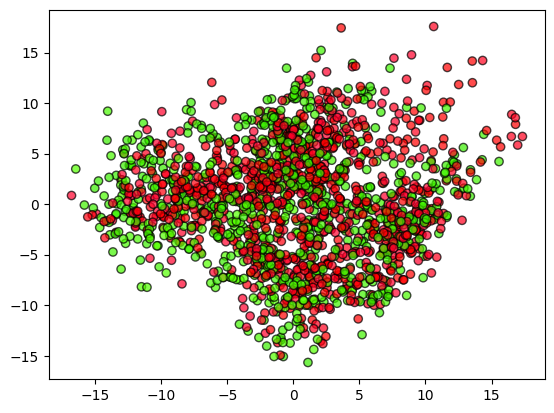

In [43]:
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_train, cmap=plt.cm.prism, edgecolor='k', alpha=0.7)

plt.show()

# General Idea
Trova il miglior iperpiano lineare oppure non-lineare che meglio separa i dati delle diverse classi 

Iperpiano che massimizza i margini è il migliore, non troppo vicino ai dati perchè se aggiungo nuove istanze potrebbe sbagliare, devo trovare iperpiano che è più utile nel fare questa separazione

# Linear SVM

I modelli 'Linear SVM' utilizzano un iperpiano lineare per separare i dati

- parametro C: assunto nei seguenti valori 0.01, 0.1, 1.0, 10.0, 100.0, è un parametro di regolarizazione sul livello di misclassification error che il può avere il modello 

In [44]:
from sklearn.svm import LinearSVC

Accuracy 0.4391025641025641
F1-score [0.57399103 0.54883721 0.50420168 0.39735099 0.34170854 0.28205128
 0.30263158 0.41441441]
              precision    recall  f1-score   support

       angry       0.50      0.67      0.57        96
        calm       0.50      0.61      0.55        96
     disgust       0.42      0.62      0.50        48
     fearful       0.55      0.31      0.40        96
       happy       0.33      0.35      0.34        96
     neutral       0.37      0.23      0.28        48
         sad       0.41      0.24      0.30        96
   surprised       0.37      0.48      0.41        48

    accuracy                           0.44       624
   macro avg       0.43      0.44      0.42       624
weighted avg       0.44      0.44      0.43       624



/Users/User/anaconda3/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


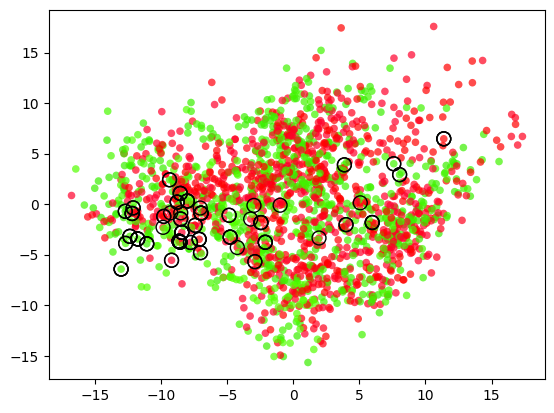

{'dual': True,
 'tol': 0.0001,
 'C': 1.0,
 'multi_class': 'ovr',
 'fit_intercept': True,
 'intercept_scaling': 1,
 'class_weight': None,
 'verbose': 0,
 'random_state': 42,
 'max_iter': 1000,
 'penalty': 'l2',
 'loss': 'squared_hinge',
 'n_features_in_': 237,
 'classes_': array([0, 1, 2, 3, 4, 5, 6, 7]),
 'coef_': array([[ 0.58748967,  0.01086526,  0.0614314 , ...,  0.83331443,
         -0.2868595 , -1.11800914],
        [-0.1150564 ,  0.19588715, -0.7944769 , ..., -0.19378588,
          0.13040511, -1.97632031],
        [ 0.5128606 , -0.07072207, -0.40917262, ...,  0.20459815,
          0.08055615, -0.35511146],
        ...,
        [-1.06959041, -0.253258  ,  0.11641363, ..., -0.17227186,
          0.12276324, -0.82862281],
        [-0.85112179, -0.04829482, -0.0311473 , ...,  0.26124603,
          0.04995822,  0.7424482 ],
        [-0.56877379,  0.06875791, -1.73696663, ...,  0.37338664,
          0.04009556,  0.09970832]]),
 'intercept_': array([-0.80191156, -2.90926481, -3.290066 

In [45]:
# CASO BASE DI LINEAR SVM C=1.0, penalty=L2

clf = LinearSVC(random_state=42)
clf.fit(x_train, y_train)

y_pred = clf.predict(x_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
labels = ['angry', 'calm', 'disgust', 'fearful', 'happy', 'neutral', 'sad', 'surprised']
print(classification_report(y_test, y_pred, target_names=labels))

x_train.shape

'''
La 'decision function' calcola il valore di una funzione lineare (o di una funzione kernel, in caso di SVM non lineare) che rappresenta il piano di separazione tra le classi. 
   - valore restituito dalla d.f. è positivo: il punto viene classificato come appartenente alla classe positiva
   - valore restituito dalla d.f. è negativo: il punto viene classificato come appartenente alla classe negativa
'''

decision_function = clf.decision_function(x_train)
# support_vector_indices = np.where((2 * y_train - 1) * decision_function <= 1)[0] # binary case 
support_vector_indices = np.where(np.abs(decision_function) <= 1)[0]
support_vectors = x_train[support_vector_indices]

support_vectors_pca = pca.transform(support_vectors)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_train, cmap=plt.cm.prism, edgecolor='none', alpha=0.7, s=30)
plt.scatter(support_vectors_pca[:100, 0], support_vectors_pca[:100, 1], s=100,
                linewidth=1, facecolors='none', edgecolors='k')
plt.show()

clf.__dict__

### graficini vari

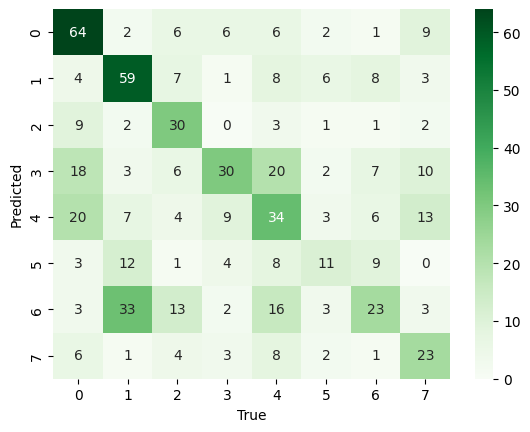

In [46]:
from sklearn.metrics import confusion_matrix
from scikitplot.metrics import plot_roc, plot_precision_recall
import seaborn as sns

# plot della CONFUSION MATRIX 
cf = confusion_matrix(y_test, y_pred)
sns.heatmap(cf, annot=True, cmap="Greens")
plt.xlabel("True")
plt.ylabel("Predicted")
plt.show()

### Eseguo un ciclo for per diversi valori di C

Valore di C= 0.001
Accuracy 0.47115384615384615
F1-score [0.63333333 0.54310345 0.5        0.47058824 0.41414141 0.18461538
 0.27972028 0.45360825]
              precision    recall  f1-score   support

       angry       0.53      0.79      0.63        96
        calm       0.46      0.66      0.54        96
     disgust       0.42      0.62      0.50        48
     fearful       0.63      0.38      0.47        96
       happy       0.40      0.43      0.41        96
     neutral       0.35      0.12      0.18        48
         sad       0.43      0.21      0.28        96
   surprised       0.45      0.46      0.45        48

    accuracy                           0.47       624
   macro avg       0.46      0.46      0.43       624
weighted avg       0.47      0.47      0.45       624



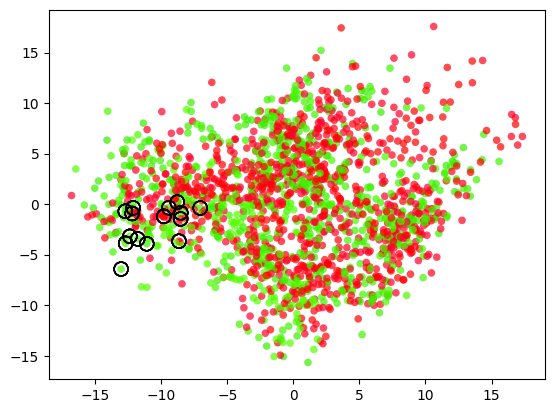

{'dual': True, 'tol': 0.0001, 'C': 0.001, 'multi_class': 'ovr', 'fit_intercept': True, 'intercept_scaling': 1, 'class_weight': None, 'verbose': 0, 'random_state': 42, 'max_iter': 1000, 'penalty': 'l2', 'loss': 'squared_hinge', 'n_features_in_': 237, 'classes_': array([0, 1, 2, 3, 4, 5, 6, 7]), 'coef_': array([[ 0.02397142, -0.00764787,  0.08578856, ..., -0.09447189,
        -0.09726897, -0.16001696],
       [ 0.02686342,  0.00221368, -0.00336398, ..., -0.15397508,
        -0.09866625, -0.21122184],
       [ 0.00367866, -0.00239538, -0.02679679, ..., -0.1455419 ,
        -0.10156666, -0.18787686],
       ...,
       [-0.01252722, -0.00332137,  0.0145068 , ..., -0.15510583,
        -0.10253354, -0.1800881 ],
       [-0.0020736 , -0.00812183,  0.00467699, ..., -0.13106511,
        -0.08950625, -0.12675298],
       [-0.00963198,  0.00438613, -0.02965086, ..., -0.14660545,
        -0.11218245, -0.15834819]]), 'intercept_': array([-0.28261928, -0.34105957, -0.39672061, -0.27733867, -0.320834

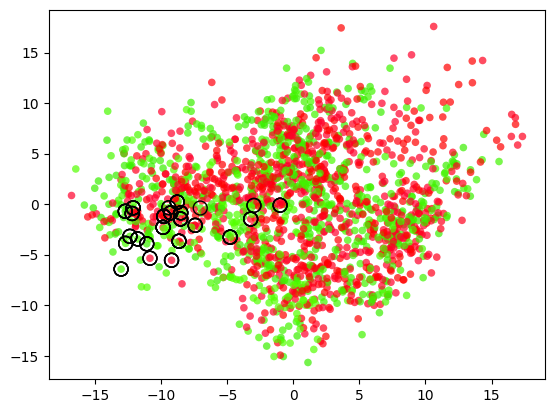

{'dual': True, 'tol': 0.0001, 'C': 0.01, 'multi_class': 'ovr', 'fit_intercept': True, 'intercept_scaling': 1, 'class_weight': None, 'verbose': 0, 'random_state': 42, 'max_iter': 1000, 'penalty': 'l2', 'loss': 'squared_hinge', 'n_features_in_': 237, 'classes_': array([0, 1, 2, 3, 4, 5, 6, 7]), 'coef_': array([[ 0.05796943, -0.01666429,  0.07544369, ..., -0.01436945,
        -0.10163912, -0.26372254],
       [ 0.00691771,  0.01572088, -0.09540184, ..., -0.2127515 ,
        -0.06851543, -0.53046406],
       [-0.0028834 , -0.00431794, -0.1096924 , ..., -0.15698269,
        -0.02238647, -0.28794068],
       ...,
       [-0.05133104, -0.00910219,  0.02056846, ..., -0.17937021,
        -0.06300965, -0.30506053],
       [-0.02394684, -0.01578351, -0.02573596, ..., -0.08668955,
        -0.02373348, -0.04103065],
       [-0.01890502,  0.00765019, -0.16884156, ..., -0.11324355,
        -0.08707439, -0.17348584]]), 'intercept_': array([-0.38208245, -0.6551458 , -0.75083612, -0.30462492, -0.6119754

/Users/User/anaconda3/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


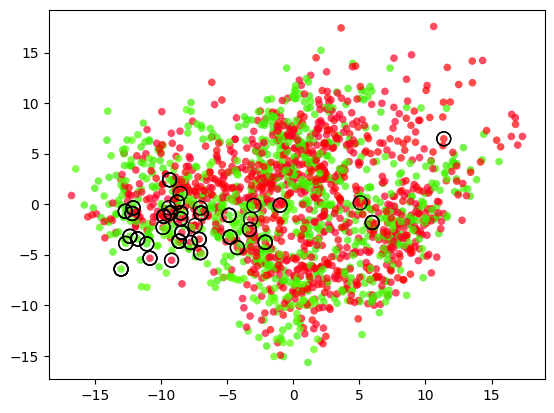

{'dual': True, 'tol': 0.0001, 'C': 0.1, 'multi_class': 'ovr', 'fit_intercept': True, 'intercept_scaling': 1, 'class_weight': None, 'verbose': 0, 'random_state': 42, 'max_iter': 1000, 'penalty': 'l2', 'loss': 'squared_hinge', 'n_features_in_': 237, 'classes_': array([0, 1, 2, 3, 4, 5, 6, 7]), 'coef_': array([[ 0.15564219, -0.01775717, -0.056218  , ...,  0.22774715,
        -0.16487481, -0.44615561],
       [-0.07282947,  0.08884023, -0.43653019, ..., -0.22206107,
        -0.00641881, -1.14883328],
       [ 0.03855397, -0.01922314, -0.31694677, ..., -0.05897111,
         0.07193297, -0.41419549],
       ...,
       [-0.233582  , -0.03763031, -0.01018656, ..., -0.15520528,
         0.03261551, -0.58175698],
       [-0.14221986, -0.03273544, -0.02965271, ...,  0.11174848,
         0.02732743,  0.36822655],
       [-0.12024904,  0.02023702, -0.66055943, ...,  0.0860938 ,
        -0.02611127, -0.13643317]]), 'intercept_': array([-0.50822321, -1.32404529, -1.55921686, -0.16067839, -1.20323214

/Users/User/anaconda3/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


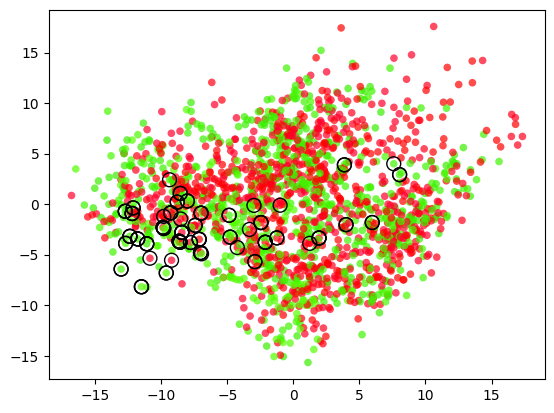

{'dual': True, 'tol': 0.0001, 'C': 10.0, 'multi_class': 'ovr', 'fit_intercept': True, 'intercept_scaling': 1, 'class_weight': None, 'verbose': 0, 'random_state': 42, 'max_iter': 1000, 'penalty': 'l2', 'loss': 'squared_hinge', 'n_features_in_': 237, 'classes_': array([0, 1, 2, 3, 4, 5, 6, 7]), 'coef_': array([[ 1.31201265e+00,  8.47956999e-02,  4.65340820e-01, ...,
         1.55418166e+00, -4.85517686e-01, -2.27318908e+00],
       [ 5.11742973e-04,  3.65228987e-01, -1.08206548e+00, ...,
        -1.09810413e-01,  2.64320927e-01, -2.85410188e+00],
       [ 1.12772273e+00, -1.40581417e-01, -6.15023616e-01, ...,
         5.36549769e-01,  1.28668507e-01, -2.78122289e-01],
       ...,
       [-2.43286477e+00, -3.32256349e-01,  3.81343826e-01, ...,
        -1.64058078e-01,  1.75628044e-01, -7.82647987e-01],
       [-2.03239927e+00, -7.59591065e-02, -6.18072057e-02, ...,
         3.73819551e-01,  4.49901650e-02,  8.48116640e-01],
       [-1.16753311e+00,  1.80199658e-01, -2.77642156e+00, ...,
 

/Users/User/anaconda3/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


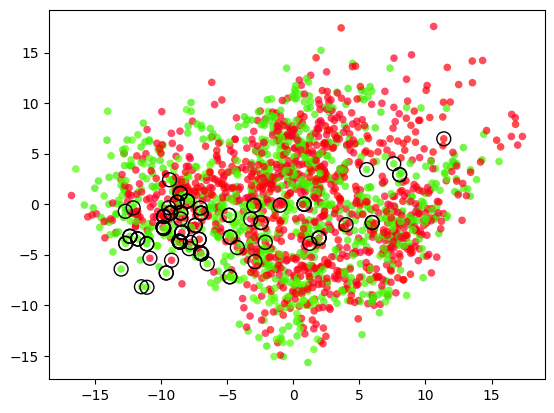

{'dual': True, 'tol': 0.0001, 'C': 100.0, 'multi_class': 'ovr', 'fit_intercept': True, 'intercept_scaling': 1, 'class_weight': None, 'verbose': 0, 'random_state': 42, 'max_iter': 1000, 'penalty': 'l2', 'loss': 'squared_hinge', 'n_features_in_': 237, 'classes_': array([0, 1, 2, 3, 4, 5, 6, 7]), 'coef_': array([[ 1.45868892e+00,  1.11003007e-01,  5.49508045e-01, ...,
         1.73227114e+00, -5.19009706e-01, -2.61134595e+00],
       [ 1.82958235e-02,  4.34232375e-01, -1.16799736e+00, ...,
         7.95821922e-04,  3.00227379e-01, -3.07779402e+00],
       [ 1.40583570e+00, -1.75881606e-01, -6.06092998e-01, ...,
         5.77762292e-01,  1.66210488e-01, -2.75580009e-01],
       ...,
       [-2.72725169e+00, -2.61378349e-01,  5.73641582e-01, ...,
        -1.61668113e-01,  1.46478141e-01, -8.18637351e-01],
       [-2.29793992e+00, -1.07796233e-01, -3.48439679e-02, ...,
         3.80187012e-01,  1.20595968e-01,  8.78097923e-01],
       [-1.28040683e+00,  1.69535411e-01, -3.05403070e+00, ...,


In [47]:
# Adesso eseguo un ciclo for per trovare i parametri di C=[0.001, 0.01, 0.1, 10.0, 100.0]

c_values=[0.001, 0.01, 0.1, 10.0, 100.0]

for c in c_values:

   print('Valore di C=', c)
   clf = LinearSVC(C=c, random_state=42)
   clf.fit(x_train, y_train)

   y_pred = clf.predict(x_test)

   print('Accuracy %s' % accuracy_score(y_test, y_pred))
   print('F1-score %s' % f1_score(y_test, y_pred, average=None))
   print(classification_report(y_test, y_pred, target_names=labels))

   '''
   La 'decision function' calcola il valore di una funzione lineare (o di una funzione kernel, in caso di SVM non lineare) che rappresenta il piano di separazione tra le classi. 
      - valore restituito dalla d.f. è positivo: il punto viene classificato come appartenente alla classe positiva
      - valore restituito dalla d.f. è negativo: il punto viene classificato come appartenente alla classe negativa
   '''

   decision_function = clf.decision_function(x_train)
   # support_vector_indices = np.where((2 * y_train - 1) * decision_function <= 1)[0] # binary case 
   support_vector_indices = np.where(np.abs(decision_function) <= 1)[0]
   support_vectors = x_train[support_vector_indices]

   support_vectors_pca = pca.transform(support_vectors)

   labels = ['angry', 'calm', 'disgust', 'fearful', 'happy', 'neutral', 'sad', 'surprised']
   plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_train, cmap=plt.cm.prism, edgecolor='none', alpha=0.7, s=30)
   plt.scatter(support_vectors_pca[:100, 0], support_vectors_pca[:100, 1], s=100,
                  linewidth=1, facecolors='none', edgecolors='k')
   plt.show()

   print(clf.__dict__)
   print('--------------------------------------------------------------------------------------------------------------------------')

#### Random Search per tuning dei parametri migliori 
- penalty
- parametro C
 

In [48]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# Crea un oggetto LinearSVC
svc = LinearSVC(random_state=42)

param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2']
}

# Crea un oggetto GridSearchCV con cross-validation a 5 suddivisioni
grid_search = GridSearchCV(svc, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Esegui la ricerca dei parametri ottimali
grid_search.fit(x_train, y_train)

# Stampa i risultati
print("Migliori parametri: ", grid_search.best_params_)
print("Miglior score: ", grid_search.best_score_)

/Users/User/anaconda3/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/User/anaconda3/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/User/anaconda3/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/User/anaconda3/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/User/anaconda3/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/User/anaconda3/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Li

Migliori parametri:  {'C': 0.1, 'penalty': 'l2'}
Miglior score:  0.4766682056017236


/Users/User/anaconda3/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


#### applico i migliori risultati ottenuti 

Accuracy 0.4583333333333333
F1-score [0.62280702 0.56880734 0.50793651 0.44155844 0.3248731  0.30952381
 0.28985507 0.42718447]
              precision    recall  f1-score   support

       angry       0.54      0.74      0.62        96
        calm       0.51      0.65      0.57        96
     disgust       0.41      0.67      0.51        48
     fearful       0.59      0.35      0.44        96
       happy       0.32      0.33      0.32        96
     neutral       0.36      0.27      0.31        48
         sad       0.48      0.21      0.29        96
   surprised       0.40      0.46      0.43        48

    accuracy                           0.46       624
   macro avg       0.45      0.46      0.44       624
weighted avg       0.46      0.46      0.44       624



/Users/User/anaconda3/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


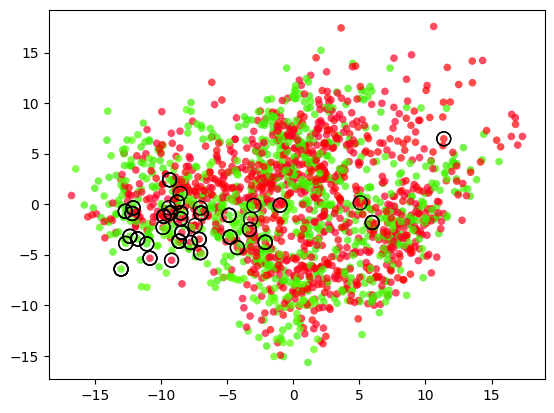

{'dual': True,
 'tol': 0.0001,
 'C': 0.1,
 'multi_class': 'ovr',
 'fit_intercept': True,
 'intercept_scaling': 1,
 'class_weight': None,
 'verbose': 0,
 'random_state': 42,
 'max_iter': 1000,
 'penalty': 'l2',
 'loss': 'squared_hinge',
 'n_features_in_': 237,
 'classes_': array([0, 1, 2, 3, 4, 5, 6, 7]),
 'coef_': array([[ 0.15564219, -0.01775717, -0.056218  , ...,  0.22774715,
         -0.16487481, -0.44615561],
        [-0.07282947,  0.08884023, -0.43653019, ..., -0.22206107,
         -0.00641881, -1.14883328],
        [ 0.03855397, -0.01922314, -0.31694677, ..., -0.05897111,
          0.07193297, -0.41419549],
        ...,
        [-0.233582  , -0.03763031, -0.01018656, ..., -0.15520528,
          0.03261551, -0.58175698],
        [-0.14221986, -0.03273544, -0.02965271, ...,  0.11174848,
          0.02732743,  0.36822655],
        [-0.12024904,  0.02023702, -0.66055943, ...,  0.0860938 ,
         -0.02611127, -0.13643317]]),
 'intercept_': array([-0.50822321, -1.32404529, -1.5592168

In [49]:
# VALORI DI SVM MIGLIORI C=0.1, penalty=L2

clf = LinearSVC(random_state=42, penalty='l2', C=0.1)
clf.fit(x_train, y_train)

y_pred = clf.predict(x_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
labels = ['angry', 'calm', 'disgust', 'fearful', 'happy', 'neutral', 'sad', 'surprised']
print(classification_report(y_test, y_pred, target_names=labels))

'''

La 'decision function' calcola il valore di una funzione lineare (o di una funzione kernel, in caso di SVM non lineare) che rappresenta il piano di separazione tra le classi. 
   - valore restituito dalla d.f. è positivo: il punto viene classificato come appartenente alla classe positiva
   - valore restituito dalla d.f. è negativo: il punto viene classificato come appartenente alla classe negativa

'''
decision_function = clf.decision_function(x_train)
# support_vector_indices = np.where((2 * y_train - 1) * decision_function <= 1)[0] # binary case 
support_vector_indices = np.where(np.abs(decision_function) <= 1)[0]
support_vectors = x_train[support_vector_indices]

support_vectors_pca = pca.transform(support_vectors)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_train, cmap=plt.cm.prism, edgecolor='none', alpha=0.7, s=30)
plt.scatter(support_vectors_pca[:100, 0], support_vectors_pca[:100, 1], s=100,
                linewidth=1, facecolors='none', edgecolors='k')
plt.show()

clf.__dict__

### graficini generali, ROC curve, precision-recall curve

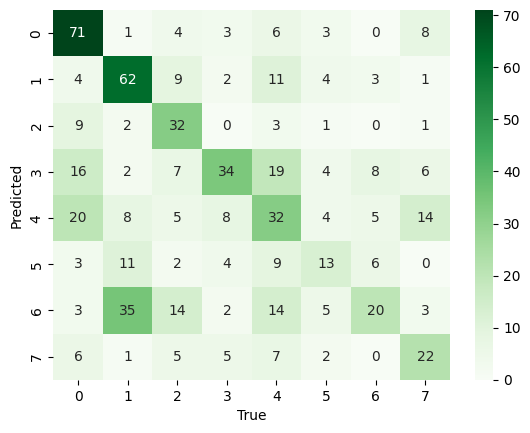

In [50]:
from sklearn.metrics import confusion_matrix
from scikitplot.metrics import plot_roc, plot_precision_recall
import seaborn as sns

# plot della CONFUSION MATRIX 
cf2 = confusion_matrix(y_test, y_pred)
sns.heatmap(cf2, annot=True, cmap="Greens")
plt.xlabel("True")
plt.ylabel("Predicted")
plt.show()

## Effect of C

In [31]:
'''
# GUIDOTTI 

from sklearn.datasets import make_blobs
from sklearn.svm import LinearSVC

X, y = make_blobs(n_samples=40, centers=2, random_state=0)

plt.figure(figsize=(10, 5))
for i, C in enumerate([1, 100]):
    # "hinge" is the standard SVM loss
    clf = LinearSVC(C=C, loss="hinge", random_state=42).fit(X, y)
    # obtain the support vectors through the decision function
    decision_function = clf.decision_function(X)
    # we can also calculate the decision function manually
    # decision_function = np.dot(X, clf.coef_[0]) + clf.intercept_[0]
    support_vector_indices = np.where((2 * y - 1) * decision_function <= 1)[0]
    support_vectors = X[support_vector_indices]

    plt.subplot(1, 2, i + 1)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 50),
                         np.linspace(ylim[0], ylim[1], 50))
    Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
                linestyles=['--', '-', '--'])
    plt.scatter(support_vectors[:, 0], support_vectors[:, 1], s=100,
                linewidth=1, facecolors='none', edgecolors='k')
    plt.title("C=" + str(C))
    #plt.scatter(clf.coef_[:, 0] + clf.intercept_, clf.coef_[:, 1] + clf.intercept_)
plt.tight_layout()
plt.show()

'''

'\n# GUIDOTTI \n\nfrom sklearn.datasets import make_blobs\nfrom sklearn.svm import LinearSVC\n\nX, y = make_blobs(n_samples=40, centers=2, random_state=0)\n\nplt.figure(figsize=(10, 5))\nfor i, C in enumerate([1, 100]):\n    # "hinge" is the standard SVM loss\n    clf = LinearSVC(C=C, loss="hinge", random_state=42).fit(X, y)\n    # obtain the support vectors through the decision function\n    decision_function = clf.decision_function(X)\n    # we can also calculate the decision function manually\n    # decision_function = np.dot(X, clf.coef_[0]) + clf.intercept_[0]\n    support_vector_indices = np.where((2 * y - 1) * decision_function <= 1)[0]\n    support_vectors = X[support_vector_indices]\n\n    plt.subplot(1, 2, i + 1)\n    plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)\n    ax = plt.gca()\n    xlim = ax.get_xlim()\n    ylim = ax.get_ylim()\n    xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 50),\n                         np.linspace(ylim[0], ylim[1], 50))\n    Z 

# Nonlinear SVM

- parametro C: assunto nei seguenti valori 0.01, 0.1, 1.0, 10.0, 100.0, è un parametro di regolarizazione sul livello di misclassification error che il può avere il modello 
- kernel function considerate: rbf, poly, sigmoid

In [53]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

### Caso base, c=1.0 e kernel='rbf', gamma=scale

Accuracy 0.4423076923076923
F1-score [0.60526316 0.52631579 0.49056604 0.45348837 0.34615385 0.17647059
 0.32926829 0.38709677]
              precision    recall  f1-score   support

       angry       0.52      0.72      0.61        96
        calm       0.49      0.57      0.53        96
     disgust       0.45      0.54      0.49        48
     fearful       0.51      0.41      0.45        96
       happy       0.32      0.38      0.35        96
     neutral       0.30      0.12      0.18        48
         sad       0.40      0.28      0.33        96
   surprised       0.40      0.38      0.39        48

    accuracy                           0.44       624
   macro avg       0.42      0.42      0.41       624
weighted avg       0.43      0.44      0.43       624



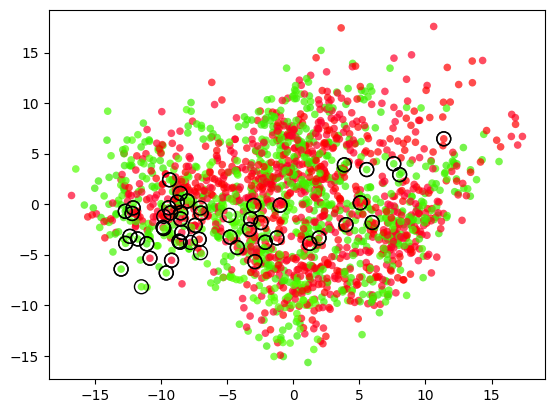

{'decision_function_shape': 'ovr',
 'break_ties': False,
 'kernel': 'rbf',
 'degree': 3,
 'gamma': 'scale',
 'coef0': 0.0,
 'tol': 0.001,
 'C': 1.0,
 'nu': 0.0,
 'epsilon': 0.0,
 'shrinking': True,
 'probability': True,
 'cache_size': 200,
 'class_weight': None,
 'verbose': False,
 'max_iter': -1,
 'random_state': 42,
 '_sparse': False,
 'n_features_in_': 237,
 'class_weight_': array([1., 1., 1., 1., 1., 1., 1., 1.]),
 'classes_': array([0, 1, 2, 3, 4, 5, 6, 7]),
 '_gamma': 0.004263864572680487,
 'support_': array([  27,   28,   29, ..., 1799, 1800, 1801], dtype=int32),
 'support_vectors_': array([[-0.30787123,  0.3127082 , -0.22671038, ...,  1.        ,
          0.        ,  1.        ],
        [-0.1952724 ,  0.00217982, -0.1873213 , ...,  1.        ,
          1.        ,  1.        ],
        [-0.92721757,  0.0047398 , -0.38049582, ...,  0.        ,
          0.        ,  1.        ],
        ...,
        [-0.87090057, -0.02810007, -0.4910156 , ...,  1.        ,
          1.      

In [54]:
clf = SVC(random_state=42, probability=True)
clf.fit(x_train, y_train)

y_pred = clf.predict(x_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred, target_names=labels))

'''
La 'decision function' calcola il valore di una funzione lineare (o di una funzione kernel, in caso di SVM non lineare) che rappresenta il piano di separazione tra le classi. 
    - valore restituito dalla d.f. è positivo: il punto viene classificato come appartenente alla classe positiva
    - valore restituito dalla d.f. è negativo: il punto viene classificato come appartenente alla classe negativa
'''

decision_function = clf.decision_function(x_train)
# support_vector_indices = np.where((2 * y_train - 1) * decision_function <= 1)[0] # binary case 
support_vector_indices = np.where(np.abs(decision_function) <= 1)[0]
support_vectors = x_train[support_vector_indices]

support_vectors_pca = pca.transform(support_vectors)

labels = ['angry', 'calm', 'disgust', 'fearful', 'happy', 'neutral', 'sad', 'surprised']
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_train, cmap=plt.cm.prism, edgecolor='none', alpha=0.7, s=30)
plt.scatter(support_vectors_pca[:100, 0], support_vectors_pca[:100, 1], s=100,
                linewidth=1, facecolors='none', edgecolors='k')
plt.show()

clf.__dict__

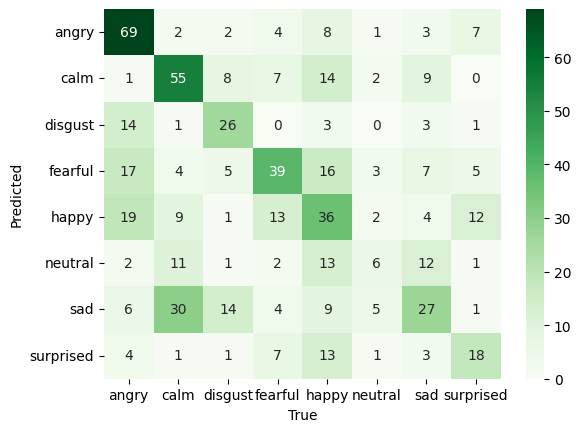

In [55]:
from sklearn.metrics import confusion_matrix
from scikitplot.metrics import plot_roc, plot_precision_recall
import seaborn as sns

# plot della CONFUSION MATRIX 
cf3 = confusion_matrix(y_test, y_pred)
sns.heatmap(cf3, annot=True, cmap="Greens", xticklabels=labels, yticklabels=labels)
plt.xlabel("True")
plt.ylabel("Predicted")
plt.show()

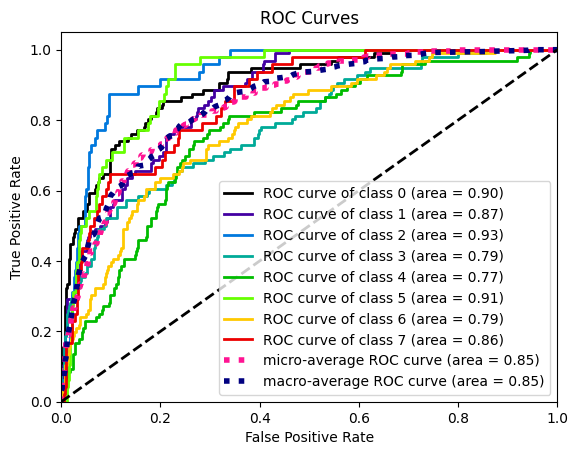

roc_auc_score 0.851676350089436


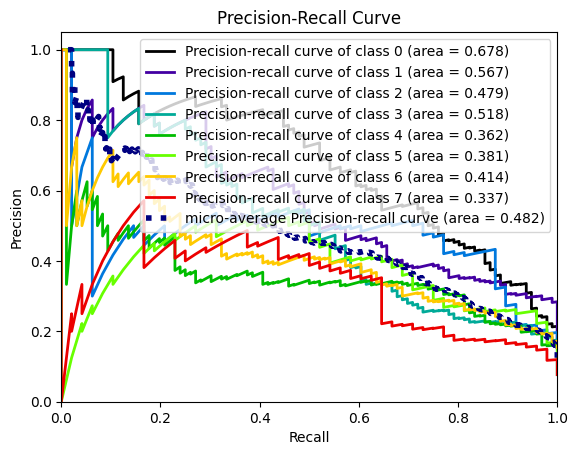

In [56]:
from scikitplot.metrics import plot_roc, plot_precision_recall

# plot della ROC CURVE 
y_pred_proba = clf.predict_proba(x_test)
# https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html
plot_roc(y_test, clf.predict_proba(x_test))
plt.show()
print('roc_auc_score',roc_auc_score(y_test, y_pred_proba, multi_class="ovr", average="macro"))

# plot della PRECISION-RECALL
plot_precision_recall(y_test, clf.predict_proba(x_test))
plt.show()

### Adesso a partire dal caso base, faccio una grid search con tutto per vedere caso migliore tra tutti (kernel, c, gamma)

In [57]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# Crea un oggetto LinearSVC
svc_grid = SVC(random_state=42)

param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'kernel':['rbf', 'poly', 'sigmoid'],
    'gamma': np.logspace(-3, 3, num=7)  # Intervallo da 10^-3 a 10^3 con 7 punti: [0.001, 0.01, 0.1, 1, 10, 100, 1000]
}

# Crea un oggetto GridSearchCV con cross-validation a 5 suddivisioni
grid_search = GridSearchCV(svc_grid, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Esegui la ricerca dei parametri ottimali
grid_search.fit(x_train, y_train)

# Stampa i risultati
print("Migliori parametri: ", grid_search.best_params_)
print("Miglior score: ", grid_search.best_score_)

'''

Migliori parametri:  {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
Miglior score:  0.6193581780538302

'''

Migliori parametri:  {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
Miglior score:  0.4639242843951985


"\n\nMigliori parametri:  {'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}\nMiglior score:  0.6193581780538302\n\n"

Accuracy 0.4791666666666667
F1-score [0.60504202 0.58415842 0.46296296 0.45       0.39378238 0.44
 0.32258065 0.47826087]
              precision    recall  f1-score   support

       angry       0.51      0.75      0.61        96
        calm       0.56      0.61      0.58        96
     disgust       0.42      0.52      0.46        48
     fearful       0.56      0.38      0.45        96
       happy       0.39      0.40      0.39        96
     neutral       0.42      0.46      0.44        48
         sad       0.42      0.26      0.32        96
   surprised       0.50      0.46      0.48        48

    accuracy                           0.48       624
   macro avg       0.47      0.48      0.47       624
weighted avg       0.48      0.48      0.47       624



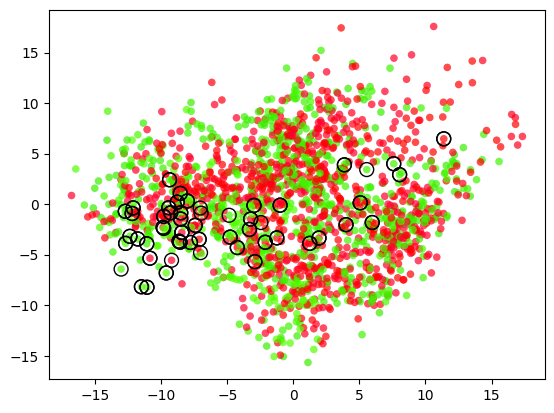

{'decision_function_shape': 'ovr',
 'break_ties': False,
 'kernel': 'rbf',
 'degree': 3,
 'gamma': 0.001,
 'coef0': 0.0,
 'tol': 0.001,
 'C': 10,
 'nu': 0.0,
 'epsilon': 0.0,
 'shrinking': True,
 'probability': True,
 'cache_size': 200,
 'class_weight': None,
 'verbose': False,
 'max_iter': -1,
 'random_state': 42,
 '_sparse': False,
 'n_features_in_': 237,
 'class_weight_': array([1., 1., 1., 1., 1., 1., 1., 1.]),
 'classes_': array([0, 1, 2, 3, 4, 5, 6, 7]),
 '_gamma': 0.001,
 'support_': array([  27,   28,   29, ..., 1798, 1800, 1801], dtype=int32),
 'support_vectors_': array([[-0.30787123,  0.3127082 , -0.22671038, ...,  1.        ,
          0.        ,  1.        ],
        [-0.1952724 ,  0.00217982, -0.1873213 , ...,  1.        ,
          1.        ,  1.        ],
        [-0.92721757,  0.0047398 , -0.38049582, ...,  0.        ,
          0.        ,  1.        ],
        ...,
        [-0.70198474, -0.02037382, -0.55000686, ...,  1.        ,
          0.        ,  0.        ],


In [58]:
svc_grid = SVC(random_state=42, C=10, gamma=0.001, kernel='rbf', probability=True)
svc_grid.fit(x_train, y_train)

y_pred = svc_grid.predict(x_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred, target_names=labels))

'''
La 'decision function' calcola il valore di una funzione lineare (o di una funzione kernel, in caso di SVM non lineare) che rappresenta il piano di separazione tra le classi. 
    - valore restituito dalla d.f. è positivo: il punto viene classificato come appartenente alla classe positiva
    - valore restituito dalla d.f. è negativo: il punto viene classificato come appartenente alla classe negativa
'''

decision_function = svc_grid.decision_function(x_train)
# support_vector_indices = np.where((2 * y_train - 1) * decision_function <= 1)[0] # binary case 
support_vector_indices = np.where(np.abs(decision_function) <= 1)[0]
support_vectors = x_train[support_vector_indices]

support_vectors_pca = pca.transform(support_vectors)

labels = ['angry', 'calm', 'disgust', 'fearful', 'happy', 'neutral', 'sad', 'surprised']
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_train, cmap=plt.cm.prism, edgecolor='none', alpha=0.7, s=30)
plt.scatter(support_vectors_pca[:100, 0], support_vectors_pca[:100, 1], s=100,
                linewidth=1, facecolors='none', edgecolors='k')
plt.show()

svc_grid.__dict__

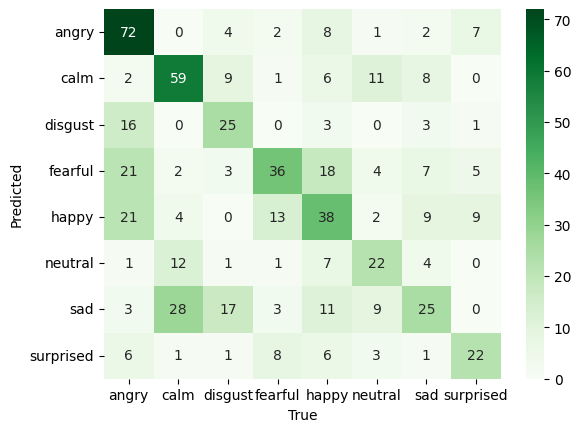

In [59]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# plot della CONFUSION MATRIX 
cf3 = confusion_matrix(y_test, y_pred)
sns.heatmap(cf3, annot=True, cmap="Greens", xticklabels=labels, yticklabels=labels)
plt.xlabel("True")
plt.ylabel("Predicted")
plt.show() 

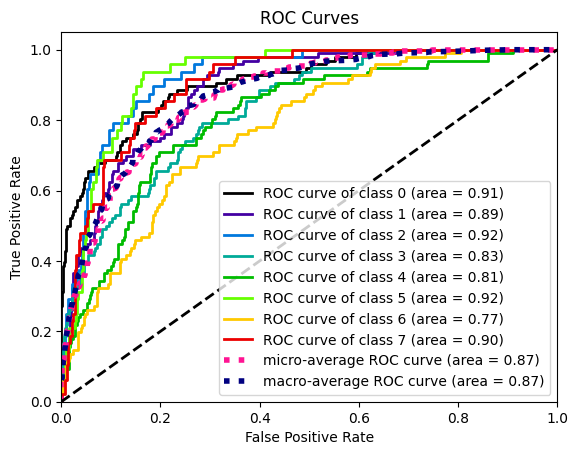

0.8698475641835017


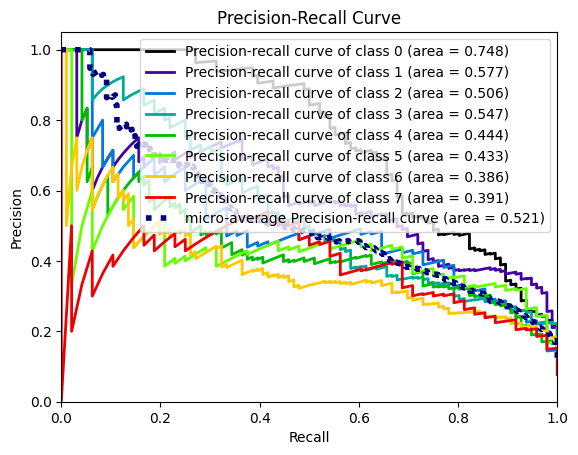

In [60]:
from scikitplot.metrics import plot_roc, plot_precision_recall

# ROC CURVE, anche se linearSVM non ha la predict_proba
y_pred_proba = svc_grid.predict_proba(x_test)
# https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html
plot_roc(y_test, svc_grid.predict_proba(x_test), )
plt.show()
print(roc_auc_score(y_test, y_pred_proba, multi_class="ovr", average="macro"))

# plot della PRECISION-RECALL
plot_precision_recall(y_test, svc_grid.predict_proba(x_test))
plt.show()

### kernel function type: RBF

In [61]:
from sklearn.metrics import auc, roc_curve 
from scikitplot.metrics import plot_roc 

In [62]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# Crea un oggetto LinearSVC
svc_grid = SVC(random_state=42)

param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'kernel':['rbf'],
    'gamma': np.logspace(-3, 3, num=7)  # Intervallo da 10^-3 a 10^3 con 7 punti: [0.001, 0.01, 0.1, 1, 10, 100, 1000]
}

# Crea un oggetto GridSearchCV con cross-validation a 5 suddivisioni
grid_search = GridSearchCV(svc_grid, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Esegui la ricerca dei parametri ottimali
grid_search.fit(x_train, y_train)

# Stampa i risultati
print("Migliori parametri: ", grid_search.best_params_)
print("Miglior score: ", grid_search.best_score_)

'''
Migliori parametri:  {'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}
Miglior score:  0.6193581780538302
'''

Migliori parametri:  {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
Miglior score:  0.4639242843951985


"\nMigliori parametri:  {'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}\nMiglior score:  0.6193581780538302\n"

### kernel function type: POLY

In [63]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# Crea un oggetto LinearSVC
svc_grid = SVC(random_state=42)

param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'kernel':['poly'],
    'gamma': np.logspace(-3, 3, num=7)  # Intervallo da 10^-3 a 10^3 con 7 punti: [0.001, 0.01, 0.1, 1, 10, 100, 1000]
}

# Crea un oggetto GridSearchCV con cross-validation a 5 suddivisioni
grid_search = GridSearchCV(svc_grid, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Esegui la ricerca dei parametri ottimali
grid_search.fit(x_train, y_train)

# Stampa i risultati
print("Migliori parametri: ", grid_search.best_params_)
print("Miglior score: ", grid_search.best_score_)

'''
Migliori parametri:  {'C': 0.001, 'gamma': 1.0, 'kernel': 'poly'}
Miglior score:  0.5741232197753936 ---> new: 0.3928731917513081
'''

Migliori parametri:  {'C': 0.001, 'gamma': 1.0, 'kernel': 'poly'}
Miglior score:  0.3928731917513081


"\nMigliori parametri:  {'C': 0.001, 'gamma': 1.0, 'kernel': 'poly'}\nMiglior score:  0.5741232197753936 ---> new: 0.3928731917513081\n"

Accuracy 0.4150641025641026
F1-score [0.55555556 0.46808511 0.46808511 0.3919598  0.38423645 0.27956989
 0.29139073 0.34883721]
              precision    recall  f1-score   support

       angry       0.47      0.68      0.56        96
        calm       0.48      0.46      0.47        96
     disgust       0.48      0.46      0.47        48
     fearful       0.38      0.41      0.39        96
       happy       0.36      0.41      0.38        96
     neutral       0.29      0.27      0.28        48
         sad       0.40      0.23      0.29        96
   surprised       0.39      0.31      0.35        48

    accuracy                           0.42       624
   macro avg       0.41      0.40      0.40       624
weighted avg       0.41      0.42      0.41       624



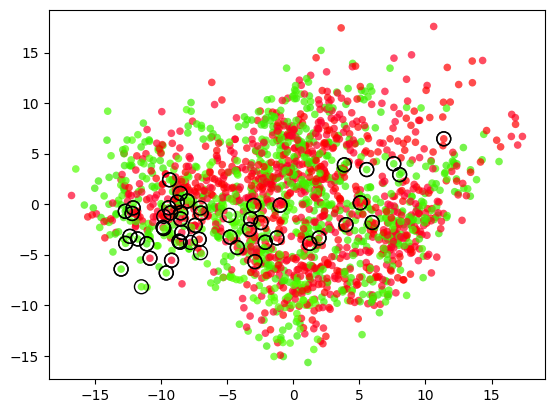

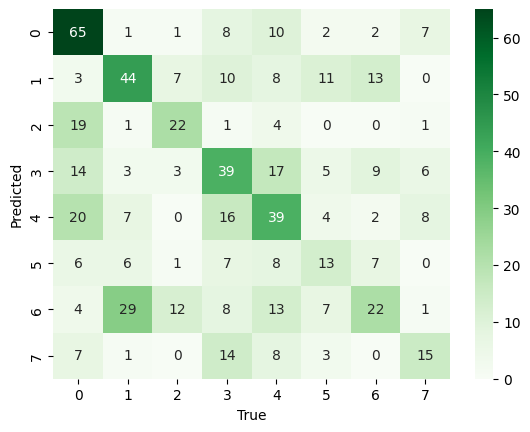

In [27]:
from sklearn.metrics import confusion_matrix
from scikitplot.metrics import plot_roc, plot_precision_recall
import seaborn as sns

svc_grid = grid_search.best_estimator_
svc_grid.fit(x_train, y_train)

y_pred = svc_grid.predict(x_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred, target_names=labels))

'''
La 'decision function' calcola il valore di una funzione lineare (o di una funzione kernel, in caso di SVM non lineare) che rappresenta il piano di separazione tra le classi. 
    - valore restituito dalla d.f. è positivo: il punto viene classificato come appartenente alla classe positiva
    - valore restituito dalla d.f. è negativo: il punto viene classificato come appartenente alla classe negativa
'''

decision_function = clf.decision_function(x_train)
# support_vector_indices = np.where((2 * y_train - 1) * decision_function <= 1)[0] # binary case 
support_vector_indices = np.where(np.abs(decision_function) <= 1)[0]
support_vectors = x_train[support_vector_indices]

support_vectors_pca = pca.transform(support_vectors)

labels = ['angry', 'calm', 'disgust', 'fearful', 'happy', 'neutral', 'sad', 'surprised']
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_train, cmap=plt.cm.prism, edgecolor='none', alpha=0.7, s=30)
plt.scatter(support_vectors_pca[:100, 0], support_vectors_pca[:100, 1], s=100,
                linewidth=1, facecolors='none', edgecolors='k')
plt.show()

clf.__dict__

# plot della CONFUSION MATRIX 
cf3 = confusion_matrix(y_test, y_pred)
sns.heatmap(cf3, annot=True, cmap="Greens")
plt.xlabel("True")
plt.ylabel("Predicted")
plt.show()

### kernel function type: SIGMOID

In [64]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import confusion_matrix
from scikitplot.metrics import plot_roc, plot_precision_recall
import seaborn as sns

# Crea un oggetto LinearSVC
svc_grid = SVC(random_state=42)

param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'kernel':['sigmoid'],
    'gamma': np.logspace(-3, 3, num=7)  # Intervallo da 10^-3 a 10^3 con 7 punti: [0.001, 0.01, 0.1, 1, 10, 100, 1000]
}

# Crea un oggetto GridSearchCV con cross-validation a 5 suddivisioni
grid_search = GridSearchCV(svc_grid, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Esegui la ricerca dei parametri ottimali
grid_search.fit(x_train, y_train)

# Stampa i risultati
print("Migliori parametri: ", grid_search.best_params_)
print("Miglior score: ", grid_search.best_score_)

'''
Migliori parametri:  {'C': 10, 'gamma': 0.001, 'kernel': 'sigmoid'}
Miglior score:  0.4544706063404124
'''

Migliori parametri:  {'C': 10, 'gamma': 0.001, 'kernel': 'sigmoid'}
Miglior score:  0.4544706063404124


"\nMigliori parametri:  {'C': 100, 'gamma': 0.001, 'kernel': 'sigmoid'}\nMiglior score:  0.4544706063404124\n"

Accuracy 0.47596153846153844
F1-score [0.61276596 0.55707763 0.52727273 0.4        0.39325843 0.49484536
 0.31847134 0.41304348]
              precision    recall  f1-score   support

       angry       0.52      0.75      0.61        96
        calm       0.50      0.64      0.56        96
     disgust       0.47      0.60      0.53        48
     fearful       0.50      0.33      0.40        96
       happy       0.43      0.36      0.39        96
     neutral       0.49      0.50      0.49        48
         sad       0.41      0.26      0.32        96
   surprised       0.43      0.40      0.41        48

    accuracy                           0.48       624
   macro avg       0.47      0.48      0.46       624
weighted avg       0.47      0.48      0.46       624



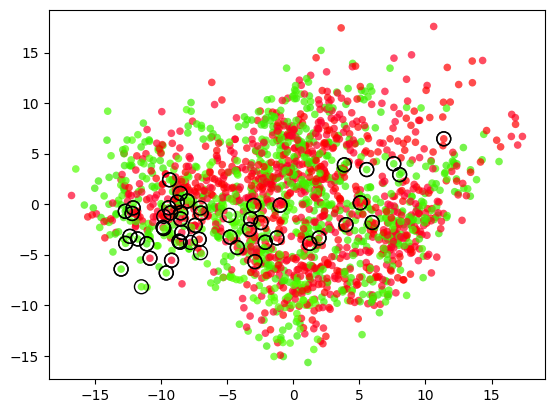

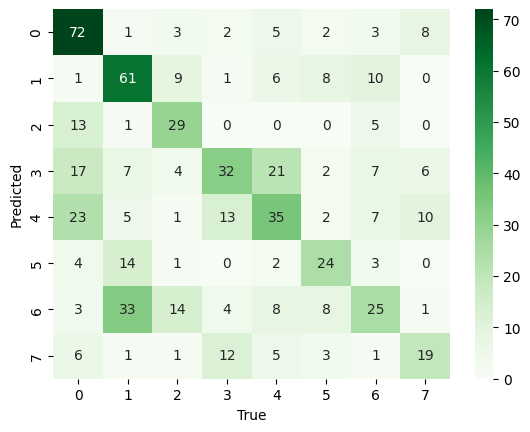

In [65]:
svc_grid = grid_search.best_estimator_
svc_grid.fit(x_train, y_train)

y_pred = svc_grid.predict(x_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred, target_names=labels))

'''
La 'decision function' calcola il valore di una funzione lineare (o di una funzione kernel, in caso di SVM non lineare) che rappresenta il piano di separazione tra le classi. 
    - valore restituito dalla d.f. è positivo: il punto viene classificato come appartenente alla classe positiva
    - valore restituito dalla d.f. è negativo: il punto viene classificato come appartenente alla classe negativa
'''

decision_function = clf.decision_function(x_train)
# support_vector_indices = np.where((2 * y_train - 1) * decision_function <= 1)[0] # binary case 
support_vector_indices = np.where(np.abs(decision_function) <= 1)[0]
support_vectors = x_train[support_vector_indices]

support_vectors_pca = pca.transform(support_vectors)

labels = ['angry', 'calm', 'disgust', 'fearful', 'happy', 'neutral', 'sad', 'surprised']
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_train, cmap=plt.cm.prism, edgecolor='none', alpha=0.7, s=30)
plt.scatter(support_vectors_pca[:100, 0], support_vectors_pca[:100, 1], s=100,
                linewidth=1, facecolors='none', edgecolors='k')
plt.show()

clf.__dict__

# plot della CONFUSION MATRIX 
cf3 = confusion_matrix(y_test, y_pred)
sns.heatmap(cf3, annot=True, cmap="Greens")
plt.xlabel("True")
plt.ylabel("Predicted")
plt.show()

#### --> anche facendo i vari singoli test sui diversi kernel, il migliore risultato resta comunque confermato quello trovato dalla grid search generale fatta ad inizio  ???

## Effect of Different Kernels

In [46]:
'''
X.shape

#from sklearn.datasets import load_iris

#iris = load_iris()
#X = iris.data
#y = iris.target

X = X[y != 0, :2]
y = y[y != 0]

n_sample = len(X)

np.random.seed(0)
order = np.random.permutation(n_sample)
X = X[order]
y = y[order].astype(np.float)

X_train = X[:int(.9 * n_sample)]
y_train = y[:int(.9 * n_sample)]
X_test = X[int(.9 * n_sample):]
y_test = y[int(.9 * n_sample):]

# fit the model
for kernel in ('linear', 'rbf', 'poly'):
    clf = SVC(kernel=kernel, gamma=10)
    clf.fit(X_train, y_train)

    plt.figure()
    plt.clf()
    plt.scatter(X[:, 0], X[:, 1], c=y, zorder=10, cmap=plt.cm.Paired,
                edgecolor='k', s=20)

    # Circle out the test data
    plt.scatter(X_test[:, 0], X_test[:, 1], s=80, facecolors='none',
                zorder=10, edgecolor='k')

    plt.axis('tight')
    x_min = X[:, 0].min()
    x_max = X[:, 0].max()
    y_min = X[:, 1].min()
    y_max = X[:, 1].max()

    XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
    Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(XX.shape)
    plt.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired)
    plt.contour(XX, YY, Z, colors=['k', 'k', 'k'],
                linestyles=['--', '-', '--'], levels=[-.5, 0, .5])

    plt.title(kernel)
plt.show()

'''

"\n\n#from sklearn.datasets import load_iris\n\n#iris = load_iris()\n#X = iris.data\n#y = iris.target\n\nX = X[y != 0, :2]\ny = y[y != 0]\n\nn_sample = len(X)\n\nnp.random.seed(0)\norder = np.random.permutation(n_sample)\nX = X[order]\ny = y[order].astype(np.float)\n\nX_train = X[:int(.9 * n_sample)]\ny_train = y[:int(.9 * n_sample)]\nX_test = X[int(.9 * n_sample):]\ny_test = y[int(.9 * n_sample):]\n\n# fit the model\nfor kernel in ('linear', 'rbf', 'poly'):\n    clf = SVC(kernel=kernel, gamma=10)\n    clf.fit(X_train, y_train)\n\n    plt.figure()\n    plt.clf()\n    plt.scatter(X[:, 0], X[:, 1], c=y, zorder=10, cmap=plt.cm.Paired,\n                edgecolor='k', s=20)\n\n    # Circle out the test data\n    plt.scatter(X_test[:, 0], X_test[:, 1], s=80, facecolors='none',\n                zorder=10, edgecolor='k')\n\n    plt.axis('tight')\n    x_min = X[:, 0].min()\n    x_max = X[:, 0].max()\n    y_min = X[:, 1].min()\n    y_max = X[:, 1].max()\n\n    XX, YY = np.mgrid[x_min:x_max:200j,